In [1]:
# Import necessary libraries for ETL and analysis purposes

import os
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import missingno as msno

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import norm, skew

pd.set_option('max_columns', None)
pd.set_option('max_rows', 90)

In [2]:
# Load csv file into its dataframe

df = pd.read_csv("../Data projects/train.csv")

# Initial inspection of dataframe

In [3]:
# Check the number of rows and columns in the dataframe

df.shape

(1460, 81)

In [4]:
# Visual inspection of the first few rows of the dataframe

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


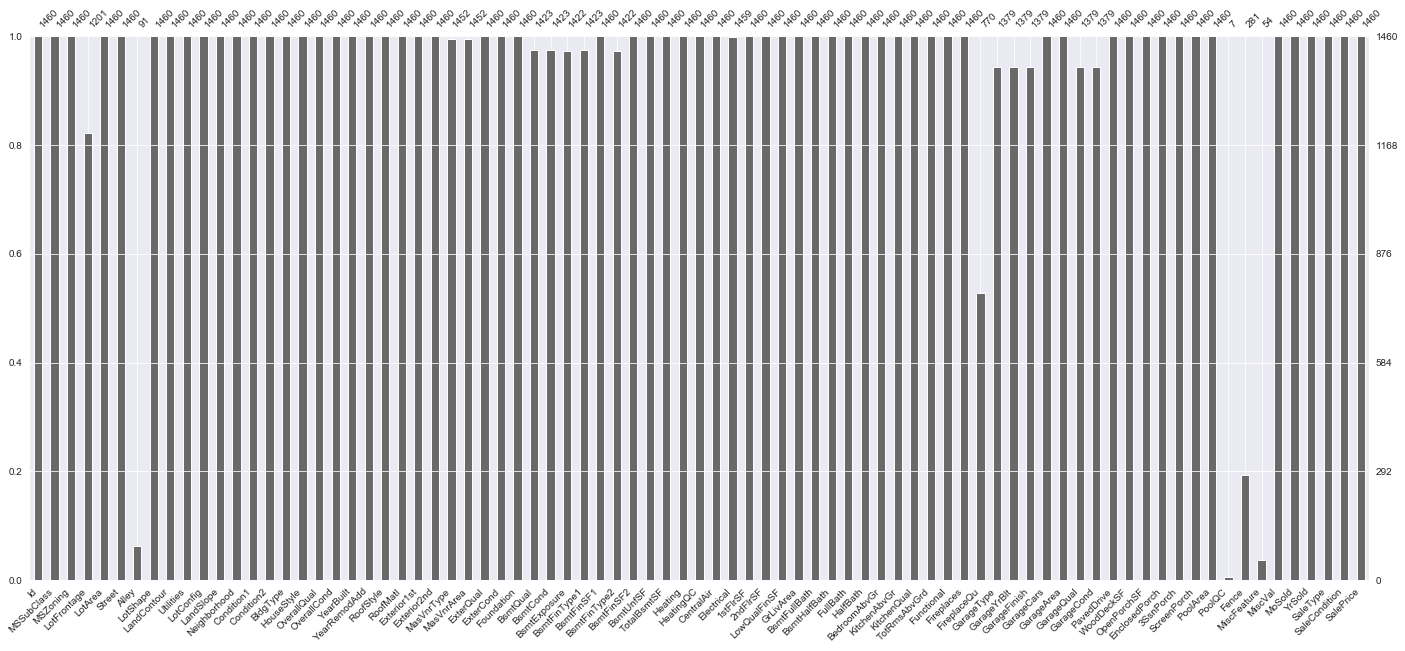

In [5]:
# Visualize the amount of missing values in each column

msno.bar(df, labels = True, fontsize = 10)

In [6]:
# Define function that takes the entire dataframe as input
# and returns the missing values per column as a percentage
# of total number of rows

def missing_perc(dff):
    print(round((dff.isnull().sum() 
                 * 100 / len(dff)),2).sort_values(ascending = False))

missing_perc(df)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [7]:
# Drop id column with all unique values; provides no value

df.drop(columns = ['Id'], inplace = True) 

In [8]:
# Check whether each column is in the correct data format 

df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
        'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtC

In [9]:
# Correcting columns that are incorrect data types
# Based on the data dictionary

df['MSSubClass'] = df['MSSubClass'].astype(str)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()).astype(int)

# Target variable inspection and treatment

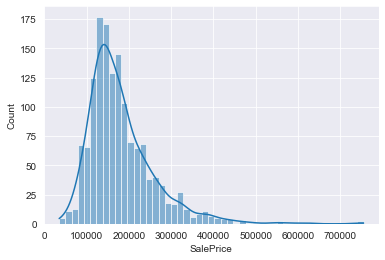

In [10]:
# Check the distribution of the target variable 
    
sns.histplot(df['SalePrice'], kde = True)

Text(0.5, 1.0, 'Log SalePrice')

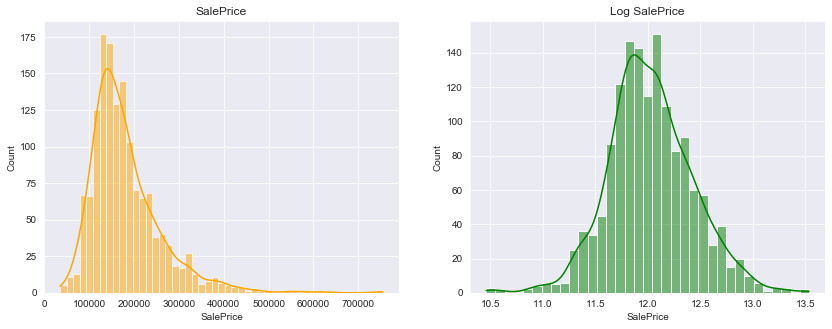

In [11]:
# Visualize true distribution and tranformed (log) 
# distribution of the target variable

fig, axes = plt.subplots(1, 2, sharex = False, figsize = (14,5))

sns.histplot(ax = axes[0], 
             data = df, 
             x = "SalePrice", 
             kde = True, 
             color = 'orange')

sns.histplot(ax = axes[1], 
             data = df, 
             x = np.log(df['SalePrice']), 
             kde = True, 
             color = 'green')

axes[0].set_title('SalePrice')
axes[1].set_title('Log SalePrice')

In [12]:
# Log transform the target variable for a
# normal distribution

df['SalePrice'] = np.log(df['SalePrice'])

# Object columns detailed inspection

In [13]:
# Create dataframe with object columns only

obj_col_df = df[['MSZoning', 'Street', 
                 'Alley', 'LotShape', 
                 'LandContour', 'Utilities',
                 'LotConfig', 'LandSlope', 
                 'Neighborhood', 'Condition1', 
                 'Condition2', 'BldgType', 
                 'HouseStyle', 'RoofStyle', 
                 'RoofMatl', 'Exterior1st', 
                 'Exterior2nd', 'MasVnrType', 
                 'ExterQual', 'ExterCond', 
                 'Foundation','BsmtQual', 
                 'BsmtCond', 'BsmtExposure', 
                 'BsmtFinType1', 'BsmtFinType2', 
                 'Heating', 'HeatingQC', 
                 'CentralAir', 'Electrical', 
                 'KitchenQual', 'Functional', 
                 'FireplaceQu', 'GarageType', 
                 'GarageFinish', 'GarageQual',
                 'GarageCond', 'PavedDrive', 
                 'PoolQC', 'Fence', 
                 'MiscFeature', 'SaleType', 
                 'SaleCondition', 'MSSubClass']].copy()

In [14]:
# Checking unique values in all columns that are objects

for col in obj_col_df: 
    print(col)
    print(obj_col_df[col].unique())

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd'

In [15]:
# Checking frequency of unique values in each object column

for col in obj_col_df: 
    print(col)
    print(df[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17


In [16]:
# Checking percentage of missing values in object columns

missing_perc(obj_col_df)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
GarageType        5.55
BsmtFinType2      2.60
BsmtExposure      2.60
BsmtQual          2.53
BsmtCond          2.53
BsmtFinType1      2.53
MasVnrType        0.55
Electrical        0.07
LotConfig         0.00
LandSlope         0.00
Utilities         0.00
RoofMatl          0.00
LandContour       0.00
LotShape          0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
Street            0.00
HouseStyle        0.00
RoofStyle         0.00
MSSubClass        0.00
Exterior1st       0.00
Exterior2nd       0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
SaleCondition     0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
KitchenQual       0.00
Functional        0.00
PavedDrive        0.00
SaleType          0.00
MSZoning   

#### Observation:
1. Based on the frequency results, we can infer that most columns are unimodal. 
2. There are some columns such as PoolQC with 99.52% missing data. However, based on the data dictionary, this column can have a 'NA' value as the house does not have a pool. We will preserve this in the data by assigning 'None' to such records and keep the column. This holds true for the following columns as well: Alley, FireplaceQu, MiscFeature, Basement columns and garage columns.
3. MasVnrType and Electrical columns have 'true' missing values and we will use the mode to impute those missing values.

In [17]:
# Impute using a constant value
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    df[column] = df[column].fillna("None")

# Impute using the column mode
for column in [
    'MasVnrType',
    'Electrical'
]:
    df[column] = df[column].fillna(df[column].mode()[0])

# Float column detailed inspection

In [18]:
# Create dataframe for float columns for further inspection

float_col_df = df[['LotFrontage', 'MasVnrArea']].copy() 

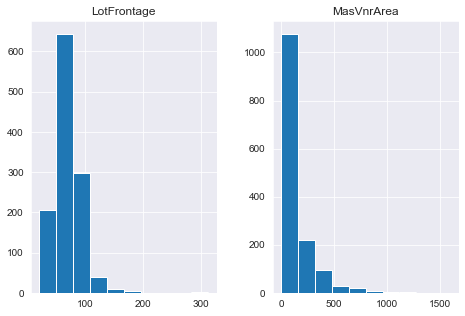

In [19]:
# Visualizing the distribution of the float columns

float_col_df.hist(layout = (1,3), figsize = (12,5))
plt.show()

In [20]:
# Checking missing values in the float columns

missing_perc(float_col_df)

LotFrontage    17.74
MasVnrArea      0.55
dtype: float64


#### Observation: 
1. Lot Frontage has 17.74% missing values. We will find the feature that it is most correlated with and use that to impute the missing values in the lot frontage column.
2. MasVnrArea has 0.55% missing values and we will use the median value for missing records.
3. Both float columns have a skewed distribution and will have to normalized before inputting into a regression model.

In [21]:
# Impute missing values using median since distribution is skewed

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [22]:
# Find the feature that is most correlated with lot frontage

overall_corr_data = df.corr()
overall_corr_data['LotFrontage'].sort_values(ascending = False)[:5]

LotFrontage    1.000000
1stFlrSF       0.457181
LotArea        0.426095
GrLivArea      0.402797
TotalBsmtSF    0.392075
Name: LotFrontage, dtype: float64

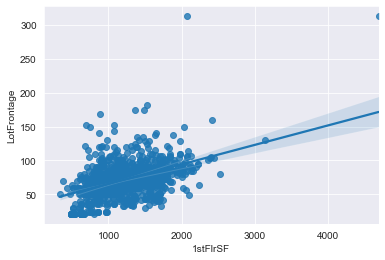

In [23]:
# Visualize the relationship between lot frontage
# and 1st floor square footage (most correlated)

sns.regplot(x = df['1stFlrSF'], y = df['LotFrontage'])

In [24]:
# Split the 1st floor square footage into five bins 
# and calculate the corresponsing mean lot frontage value

Lotfrontage_bins = np.linspace(df['1stFlrSF'].min(), 
                               df['1stFlrSF'].max(), 6)

Lotfrontage_groups = df.groupby(pd.cut(df['1stFlrSF'], 
                                       Lotfrontage_bins))

print(Lotfrontage_groups['LotFrontage'].mean())

1stFlrSF
(334.0, 1205.6]      64.908602
(1205.6, 2077.2]     77.151376
(2077.2, 2948.8]     94.833333
(2948.8, 3820.4]    130.000000
(3820.4, 4692.0]    313.000000
Name: LotFrontage, dtype: float64


In [25]:
# Use the means calculated above to impute missing values
# in the lot frontage column

def impute_LotFrontage(c):
    g = c[0]
    p = c[1]
    if pd.isnull(g):
        if p <= 1205.6:
            return 64.908602
        elif 1205.6 <p<= 2077.2:
            return 77.151376
        elif 2077.2 <p<= 2948.8:
            return 94.833333
        elif 2948.8 <p<= 3820.4:
            return 130.000000
        elif p> 3820.4:
            return 313.000000      
    else:
        return g
    
df['LotFrontage'] = df[['LotFrontage', '1stFlrSF']].apply(impute_LotFrontage, axis=1)

# Integer column detailed inspection

In [26]:
# Create dataframe for integer columns for further inspection

int_col_df = df[['LotArea', 'OverallQual', 
                 'OverallCond', 'YearBuilt', 
                 'YearRemodAdd', 'BsmtFinSF1', 
                 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', 
                 '2ndFlrSF', 'LowQualFinSF', 
                 'GrLivArea', 'BsmtFullBath', 
                 'BsmtHalfBath', 'FullBath', 
                 'HalfBath', 'BedroomAbvGr',
                 'KitchenAbvGr', 'TotRmsAbvGrd', 
                 'Fireplaces', 'GarageCars',
                 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', 
                 '3SsnPorch', 'ScreenPorch', 
                 'PoolArea', 'MiscVal', 
                 'MoSold', 'YrSold', 
                 'SalePrice', 'GarageYrBlt']].copy()

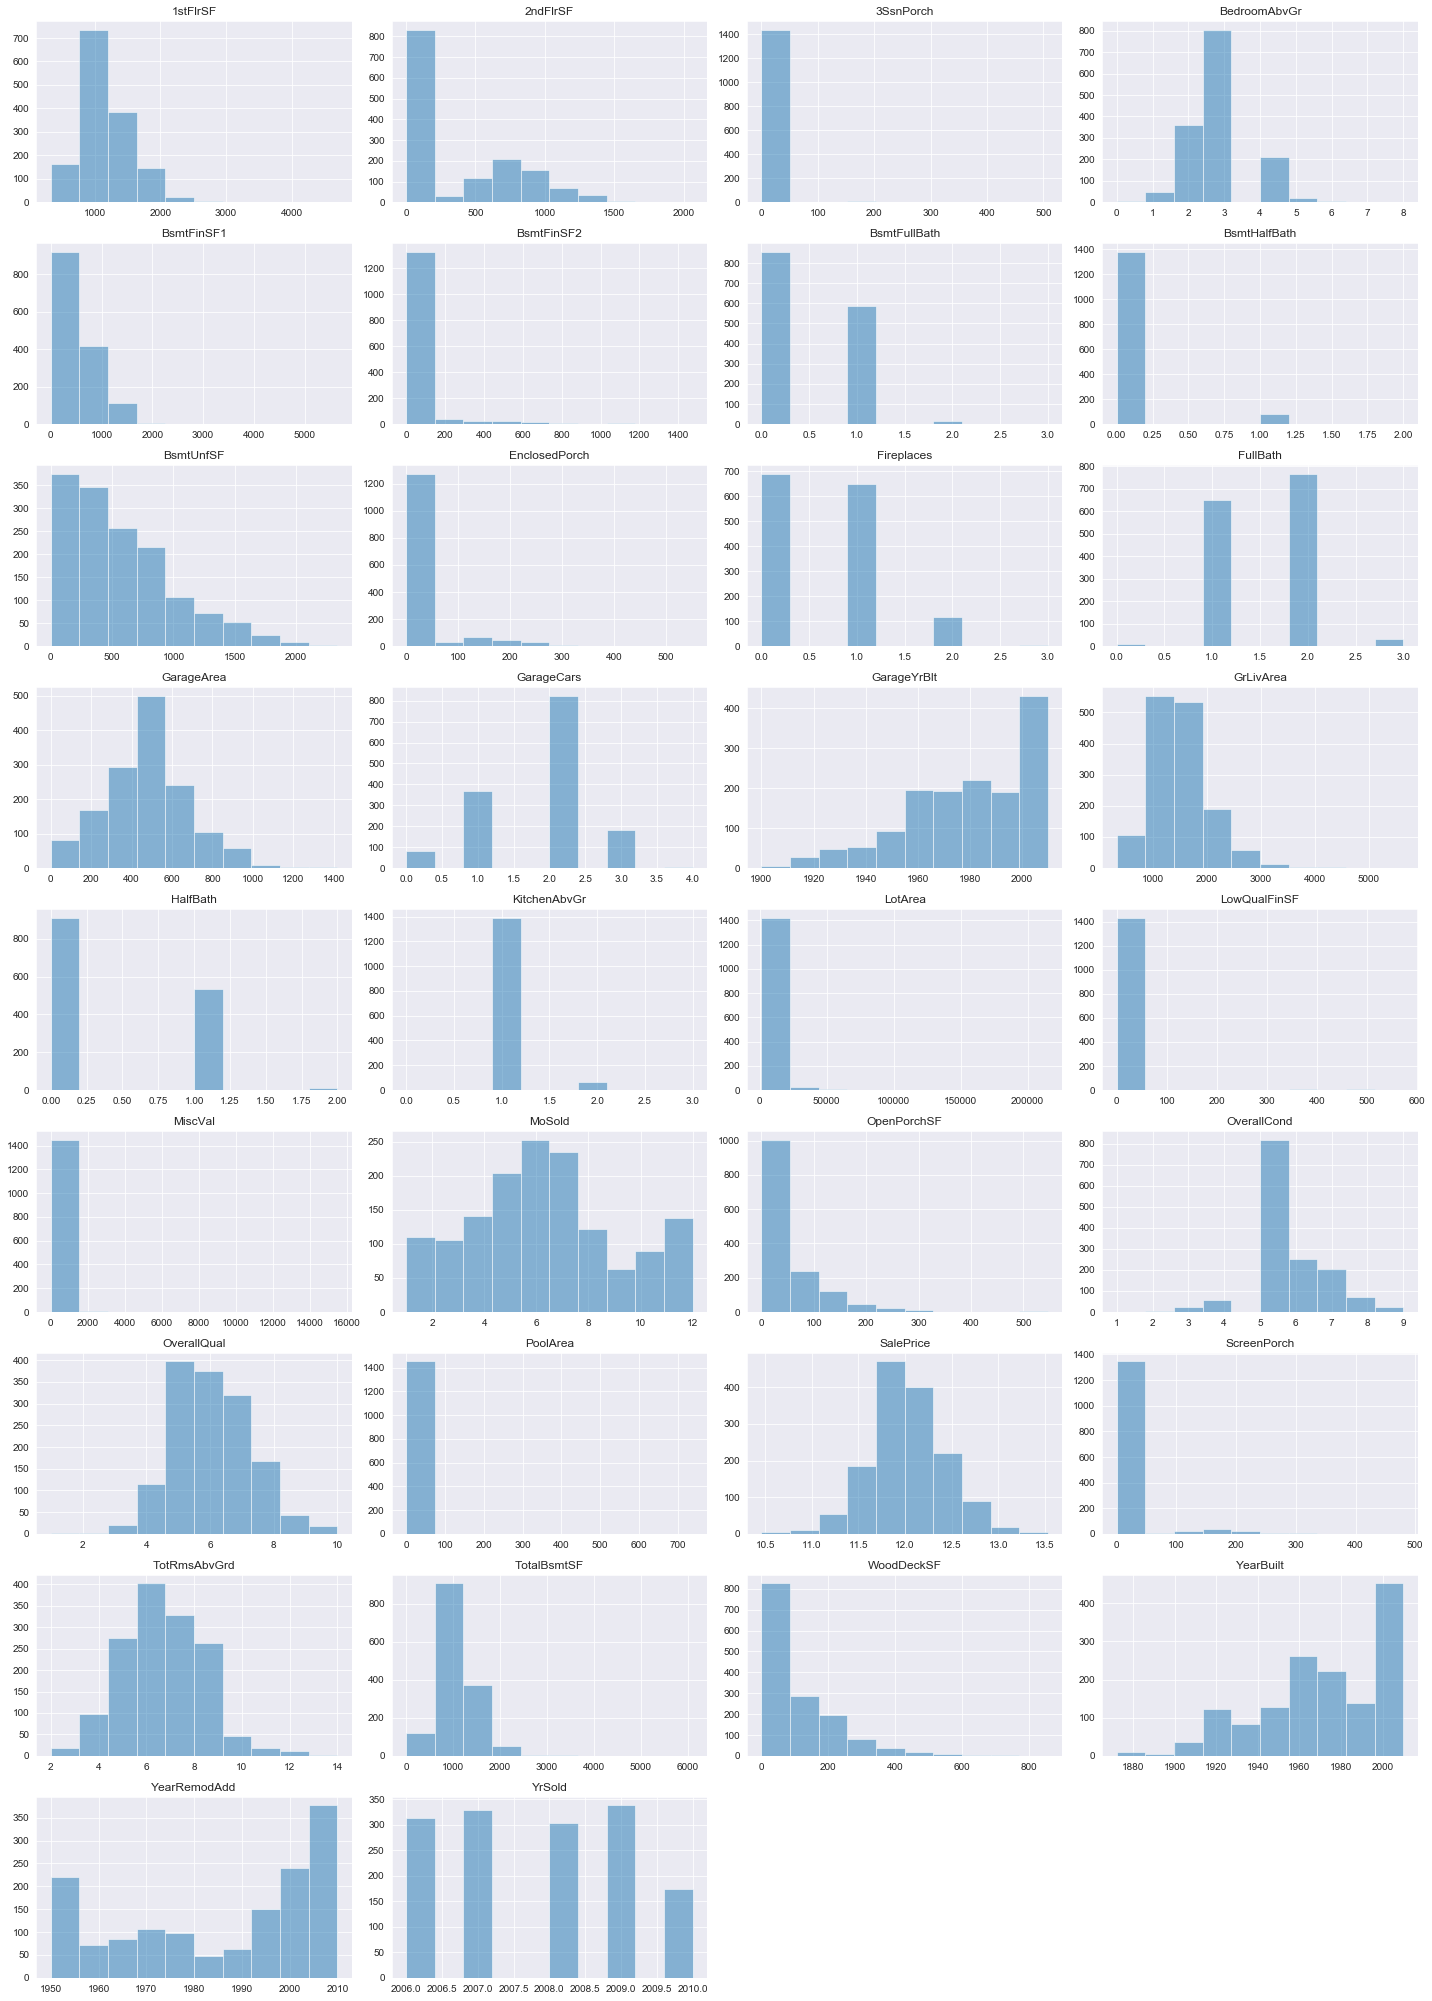

In [27]:
# Visualize the integer columns

int_col_df.hist(layout = (13,4), 
                figsize = (20,40), 
                alpha = 0.5)

plt.tight_layout()
plt.show()

In [28]:
# Checking for missing values in integer columns

missing_perc(int_col_df)

GarageYrBlt      0.0
TotalBsmtSF      0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
BsmtUnfSF        0.0
SalePrice        0.0
BsmtFinSF2       0.0
BsmtFinSF1       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
LotArea          0.0
dtype: float64


#### Observation:
1. No missing values in integer columns.
2. Square footage columns such as 1stFlrSF, BsmntFinSF1, GrLivingArea are right skewed and will have to normalized before inputting into a regressioin model.

# Feature engineering

In [29]:
# Create features using existing features

df['Age_of_home'] = df['YrSold'] - df['YearBuilt']

    
df['SqFtPerRoom'] = df['GrLivArea']  / (df['TotRmsAbvGrd'] 
                                      + df['FullBath'] 
                                      + df['HalfBath'] 
                                      + df['KitchenAbvGr'])

    
df['Total_Bathrooms'] = (df['FullBath'] 
                         + (0.5 * df['HalfBath']) 
                         + df['BsmtFullBath'] 
                         + (0.5 * df['BsmtHalfBath']))


df['TotalSF'] = (df['TotalBsmtSF'] 
               + df['1stFlrSF'] 
               + df['2ndFlrSF'])

In [30]:
# Create features using existing and newly 
# created features

df['Built_SF_perc_of_Lot_size'] = df['TotalSF'] / df['LotArea']

In [31]:
# Drop year columns; features have been extracted from them

df = df.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis = 1)

# Skewness and log transformation

In [32]:
# Check for skewness in the number columns
# and flag the ones with skew > 0.5

skew_df = pd.DataFrame(df.select_dtypes(np.number).columns, 
                       columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(df[feature]))

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)

skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)

skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,2.309873,2.309873,True
1,LotArea,12.195142,12.195142,True
2,OverallQual,0.216721,0.216721,False
3,OverallCond,0.692355,0.692355,True
4,MasVnrArea,2.674865,2.674865,True
5,BsmtFinSF1,1.683771,1.683771,True
6,BsmtFinSF2,4.250888,4.250888,True
7,BsmtUnfSF,0.919323,0.919323,True
8,TotalBsmtSF,1.522688,1.522688,True
9,1stFlrSF,1.375342,1.375342,True


In [33]:
# Describe the above columns in terms of some
# descriptive statistics

df.select_dtypes(np.number).describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_home,SqFtPerRoom,Total_Bathrooms,TotalSF,Built_SF_perc_of_Lot_size
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.130958,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051,36.547945,157.307896,2.210616,2567.048630,0.304467
std,22.284247,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452,30.250152,28.149217,0.785399,821.714421,0.174531
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242,0.000000,83.500000,1.000000,334.000000,0.019383
25%,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097,8.000000,137.741071,2.000000,2009.500000,0.211624
50%,68.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505,35.000000,154.666667,2.000000,2474.000000,0.265723
75%,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731,54.000000,172.584821,2.500000,3004.000000,0.329338
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473,136.000000,352.625000,6.000000,11752.000000,1.376923


In [34]:
# Transform columns with skew > 0.5
# Using log1p transformation as many variables have a zero min value
# and log(0) would cause an error

for column in skew_df.query("Skewed == True")['Feature'].values:
    df[column] = np.log1p(df[column])

In [35]:
# Check the first few rows of the transformed dataframe

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age_of_home,SqFtPerRoom,Total_Bathrooms,TotalSF,Built_SF_perc_of_Lot_size
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,RFn,2,548,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0.0,None,None,None,0.0,2,2008,WD,Normal,12.247694,1.791759,4.966335,3.5,7.850493,0.265182
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,RFn,2,460,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0.0,None,None,None,0.0,5,2007,WD,Normal,12.109011,3.465736,4.950335,2.5,7.833996,0.233424
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,RFn,2,608,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0.0,None,None,None,0.0,9,2008,WD,Normal,12.317167,2.079442,5.190732,3.5,7.903596,0.215541
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,Unf,3,642,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0.0,None,None,None,0.0,2,2006,WD,Abnorml,11.849398,4.521789,5.256337,2.0,7.813592,0.230280
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,RFn,3,836,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0.0,None,None,None,0.0,12,2008,WD,Normal,12.429216,2.197225,5.136251,3.5,8.114923,0.210611


# Encoding object variables

In [36]:
# Converting all object columns with n unique
# values into n-1 columns with binary values 
# for each unique value

df_encoded = pd.get_dummies(df, drop_first = True)

In [37]:
# Inspect the final dataframe

df_encoded.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_home,SqFtPerRoom,Total_Bathrooms,TotalSF,Built_SF_perc_of_Lot_size,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_Mn

# Statistical data exploration using statsmodels

In [38]:
# Descriptive statistics on the encoded dataframe

df_encoded.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_home,SqFtPerRoom,Total_Bathrooms,TotalSF,Built_SF_perc_of_Lot_size,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_Mn

#### Observation:
From the .describe() method above it is evident that the variance among features is different. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In [39]:
# Drop the target variable to create dataframe
# of independent feaures

drop_list = ['SalePrice']
X = df_encoded.drop(drop_list, axis = 1).copy() 

In [40]:
# Scale features to have unit variance

scaler = StandardScaler() # initialize the scaler
scaler.fit(X) # fit the X dataframe to the scaler

X_scaled = pd.DataFrame(scaler.transform(X), # return the transformed dataframe
                        index = X.index, 
                        columns = X.columns)

In [41]:
# Store the target variable in its own dataframe

y = df_encoded['SalePrice'].copy()

In [42]:
# Adding the needed intercept to our model

constant = sm.add_constant(X_scaled)

In [43]:
# Generate regression summary for the entire dataset

model = sm.OLS(endog = y, exog = constant) # initialize OLS regression model

result = model.fit() # fit regression model

print(result.summary()) # inspect the results

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     80.20
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        10:28:17   Log-Likelihood:                 1416.7
No. Observations:                1460   AIC:                            -2297.
Df Residuals:                    1192   BIC:                            -880.7
Df Model:                         267                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [44]:
# Check for multicollinearity as indicated by the warnings
# generated by the above OLS model

vif = pd.DataFrame() # create dataframe for store vif values and corresponding features

# calculate vif for each feature
vif['VIF Factor'] = [variance_inflation_factor(X_scaled.values, 
                                               i) for i in range(X_scaled.shape[1])]

vif['features'] = X_scaled.columns

C:\Users\tanvi\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
# Check vif dataframe for results

vif.round(2)

,VIF Factor,features
0,3.81,LotFrontage
1,36.08,LotArea
2,6.00,OverallQual
3,2.41,OverallCond
4,28.35,MasVnrArea
...,...,...
269,1.73,SaleCondition_AdjLand
270,2.21,SaleCondition_Alloca
271,1.45,SaleCondition_Family
272,3.60,SaleCondition_Normal


#### Observations:
1. R-squared value of 0.947 shows that 94.7% of the variance in the target variable (log sale price) is explained by the independent features. Adjusted R-squared value of 0.935 (less than R-squared) indicates that there are features included in our regression model that are not meaningful.
2. The features that are not significant are in the P > |t| column with values greater than 0.05. 
3. Prob (F - statistic) of 0 is the p - value for the regression as a whole. This tells the overall significance of the regression unlike the t-statistic that measures significance for each variable. The null hypothesis is that all the regression co-efficients are equal to zero. Prob (F - statistic) depicts the probability of the null hypothesis being true. With overall probability as zero, we can imply that the overall regression is meaningful.
4. Omnibus/Prob(Omnibus) is a test to check normalcy of the residuals. We hope to see a low number for the omnibus value and a value closer to 1 for prob(omnibus) for us to determine that the residuals are normally distributed. In our case that is not true which indicates a non-linear approach could be better.
5. Skewness is a measure of data symmetry and a value of -0.951 shows residuals have a skewed distribution. Again, this indicates that a non-linear approach could yield better results.
6. Kurtosis of 10.693 is high indicating 'fat tails' or outliers in our residuals.
7. Durbin-Watson tests for autocorrelation and can have values between 0 - 4. We want the value to be close to 2 for less autocorrelation. The value generated is very close to 2 and therefore suggests little autocorrelation. 
8. Jarque-Bera/Prob(JB) are in line with the Omnibus tests. We want a small value and a probability close to 1. Both these conditioins are violated by our results and this is another indicator that a non-linear approach could be better.
9. There is high multicollinearity among the independent features indicated by high VIF scores. VIF is calculated by taking an independent feature and regressing it against the rest of the independent features. VIF = 1/(1-R^2); therefore a VIF of 5 will indicate that 80% of the variation in a particular independent features is explained by the rest of the features 

# Non linear approach using XGBoost regressor

In [46]:
# Split the X and y datasets into training and test sets
# Using unscaled independent features 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
# Initiate XGBoost regressor model

xgb = XGBRegressor(objective = 'reg:squarederror', 
                   n_estimators = 1000, 
                   colsample_bytree = 0.5)

xgb.fit(X_train, y_train, verbose = False) # fit the model to the training data

XGBRegressor(colsample_bytree=0.5, n_estimators=1000,
             objective='reg:squarederror')

In [48]:
# Predict the house prices in the test set

y_pred_xgb = xgb.predict(X_test)

In [49]:
# Measure r^2 score between the actual and predicted values

r2_score(y_test, y_pred_xgb)*100

89.87181128404309

In [50]:
# Generate MSE using actual and predicted values

mean_squared_error(y_test, y_pred_xgb)

0.017537911652573915

In [51]:
# Convert the MSE (currently log transformed) to
# dollar amount

np.exp(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

1.141599992497405

## Optimization

#### Parameters to be optimized:
1. eta [default=0.3, alias: learning_rate]. Step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features, and eta shrinks the feature weights to make the boosting process more conservative. Range: [0,1]

2. max_depth [default=6]. Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 is only accepted in lossguided growing policy when tree_method is set as hist or gpu_hist and it indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree.

3. gamma [default=0, alias: min_split_loss]. Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be. Range: [0,∞]

4. lambda [default=1, alias: reg_lambda]. L2 regularization term on weights. Increasing this value will make model more conservative.

5. colsample_bytree is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.

6. subsample [default=1]. Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration. Range: (0,1]

https://xgboost.readthedocs.io/en/latest/parameter.html

#### Loss function and evaluation metric
We will use GriDSearchCV method to obtain the best parameters given the objective (loss) function i.e. squared error. We will evaluate the parameters chosen on our test set using the evaluation metric i.e. root mean squared error. 


In [52]:
# Create list of possible options for each parameter chosen

#param_grid = {
#    'max_depth' : [3,5,7],
#    'gamma' : [0.05, 0.1, 0.2],
#    'reg_lambda' : [0, 1, 2],
#    'learning_rate' : [0.01, 0.1, 0.2],
#    'subsample' : [0.7, 0.9, 1.0],
#    'colsample_bytree' : [0.5, 0.7]
#}

In [53]:
# Initialize GridSearchCV and pass in the scoring method and
# parameter grid created above

#optimal_params = GridSearchCV(
#                 estimator = XGBRegressor(objective = 'reg:squarederror',
#                                         seed = 42),
#                 param_grid = param_grid,
#                 scoring = 'neg_mean_squared_error',
#                 verbose = 2,
#                 n_jobs = -1,
#                 cv = 3
#)

In [54]:
# Apply the fit method to the training set and 
# evaluate using loss function i.e. root mean squared error

#optimal_params.fit(X_train,
#                  y_train,
#                  early_stopping_rounds = 10,
#                  eval_metric = 'rmse',
#                  eval_set = [(X_test, y_test)],
#                  verbose = False)
#print(optimal_params.best_params_)

#### Output:
1. Fitting 3 folds for each of 486 candidates, totalling 1458 fits
   {'colsample_bytree': 0.5, 'gamma': 0.05, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0, 'subsample': 1.0}

In [55]:
# Use optimal parameters from the above search
# to initiate the model and fit the test data 

xgb_opt = XGBRegressor(objective = 'reg:squarederror', 
                       n_estimators = 1000,
                       gamma = 0.05, 
                       learning_rate = 0.1, 
                       max_depth = 3,
                       reg_lambda = 0, 
                       subsample = 1, 
                       colsample_bytree = 0.5)

xgb_opt.fit(X_train, y_train, verbose = False)

XGBRegressor(colsample_bytree=0.5, gamma=0.05, n_estimators=1000,
             objective='reg:squarederror', reg_lambda=0)

In [56]:
# Predict using model with optimal parameters
# on the test data

y_pred_xgb_opt = xgb_opt.predict(X_test)

In [57]:
# Generate r^2 score using actual vs
# predicted values

r2_score(y_test, y_pred_xgb_opt)*100

90.03767026971168

In [58]:
# Generate MSE using actual and predicted values

mean_squared_error(y_test, y_pred_xgb_opt)

0.017250711214369344

In [59]:
# Convert the MSE (currently log transformed) to
# dollar amount

np.exp(np.sqrt(mean_squared_error(y_test, y_pred_xgb_opt)))

1.140357674643519

In [60]:
# Generate MAE (currently log transformed) to
# and convert to dollar amount

np.exp(mean_absolute_error(y_test, y_pred_xgb_opt))

1.0912300488577134

#### Observations:
1. The optimal parameters have improved the mean error from 1.1416 dollars to 1.1404 dolalrs which is a slight improvement.
2. The mean absolute error using the optimal parameters is 1.0912 dollars.
3. The r^2 value using the optimal parameters has increased to 90.04% from 89.87% 

# Top 20 features

#### Note:
Gain is the improvement in accuracy brought by a particular feature to the branches that it is connected to. Total gain is simply the summation of gain values across all the splits that the feature is used in.

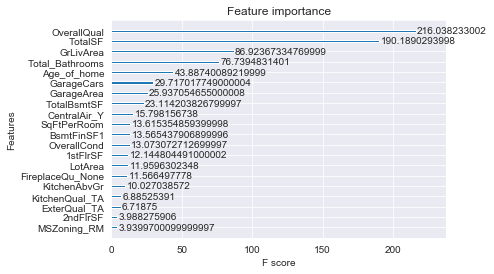

In [61]:
# Obtain the top 20 features as per our model
# based on 'total gain'

plot_importance(xgb_opt,max_num_features = 20, 
                importance_type = 'total_gain')

# Actual vs Predicted

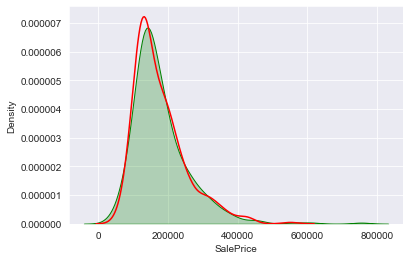

In [62]:
# Visual comparison of actual vs predicted

actual = np.exp(y_test)
predicted = np.exp(y_pred_xgb_opt)

sns.kdeplot(actual, color = 'green', shade = 1)
sns.kdeplot(predicted, color = 'red')

# Linear regression assumptions

In [63]:
# Calculate residuals

residuals = y_test.values - y_pred_xgb_opt

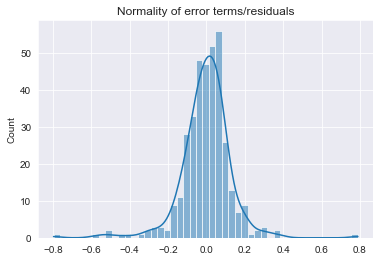

In [64]:
# Check for normality of residuals

p = sns.histplot(x = residuals, kde = True)
p = plt.title('Normality of error terms/residuals')

#### Observation:
Residuals seems normally distributed.

In [65]:
# Mean of residuals

mean_residuals = np.exp(np.mean(residuals))
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.9978902134514676


#### Observation:
The mean of residuals in dollars is very close to zero given the fact that the range of data is the hundreds of thousands.

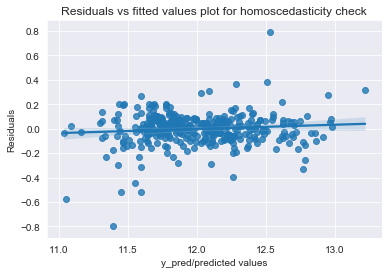

In [66]:
# Check for homoskedasticity in the residuals

p = sns.regplot(x = y_pred_xgb_opt,
                y = residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### Observation:
There appears to be no pattern in the residuals and we can conclude that the residuals are not heteroskedastic.

C:\Users\tanvi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


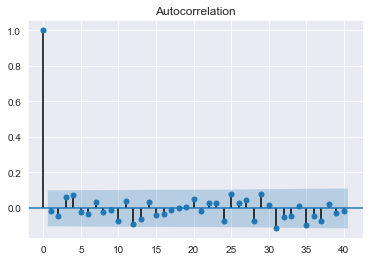

In [67]:
# Check for autocorrelation of the residuals

acf = smt.graphics.plot_acf(residuals, 
                            lags = 40, 
                            alpha = 0.05)

acf.show()

#### Observation:
No autocorrelation at alpha = 0.5 or 95% confidence intervals. We can infer that the residuals are not related with each other in any way.